# Seaborn Data Visualization – Task  

## Exercise 1: Histogram with a new dataset
Goal: Plot the age distribution of Titanic passengers.

- Load the "titanic" dataset with sns.load_dataset().
- Use sns.histplot() on age.
- Add a title and axis labels.
- Bonus: split by survival status with hue="survived".

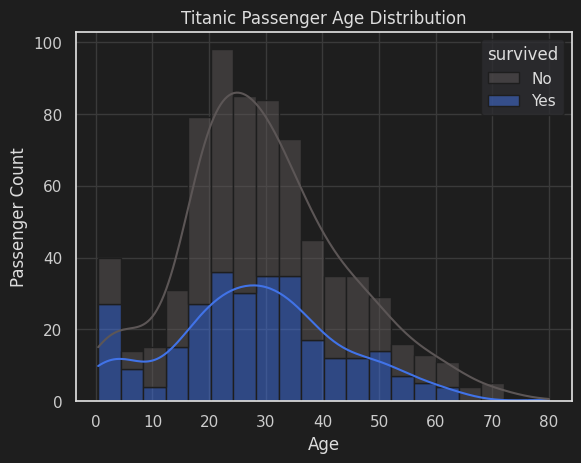

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(
    style="darkgrid",
    rc={
        "axes.facecolor": "#1e1e1e",
        "figure.facecolor": "#1e1e1e",
        "axes.edgecolor": "#DDDDDD",
        "axes.labelcolor": "#DDDDDD",
        "xtick.color": "#CCCCCC",
        "ytick.color": "#CCCCCC",
        "text.color": "#DDDDDD",
        "grid.color": "#3a3a3a",
        "legend.edgecolor": "#1e1e1e",
        "legend.facecolor": "#2d2d30",
        "patch.edgecolor": "#1e1e1e",
    },
)
sns.set_palette(["#4fc3f7", "#f48fb1", "#fbc02d", "#aed581", "#ce93d8"])

df_titanic = sns.load_dataset("titanic")
df_titanic["survived"] = df_titanic["survived"].map({0: "No", 1: "Yes"})

# Plot histogram
sns.histplot(
    data=df_titanic,
    x="age",
    hue="survived",
    multiple="stack",
    kde=True,
    palette={"Yes": "#4173e8", "No": "#5c5656"},
)
plt.title("Titanic Passenger Age Distribution")
plt.xlabel("Age")
plt.ylabel("Passenger Count")

plt.show()

# Bonus: add hue="survived" to separate survivors vs non-survivors

## Exercise 2: Pairplot for Iris
Goal: Explore relationships between iris flower measurements.

- Load the "iris" dataset.
- Create a pairplot with sns.pairplot().
- Color points by species using hue.

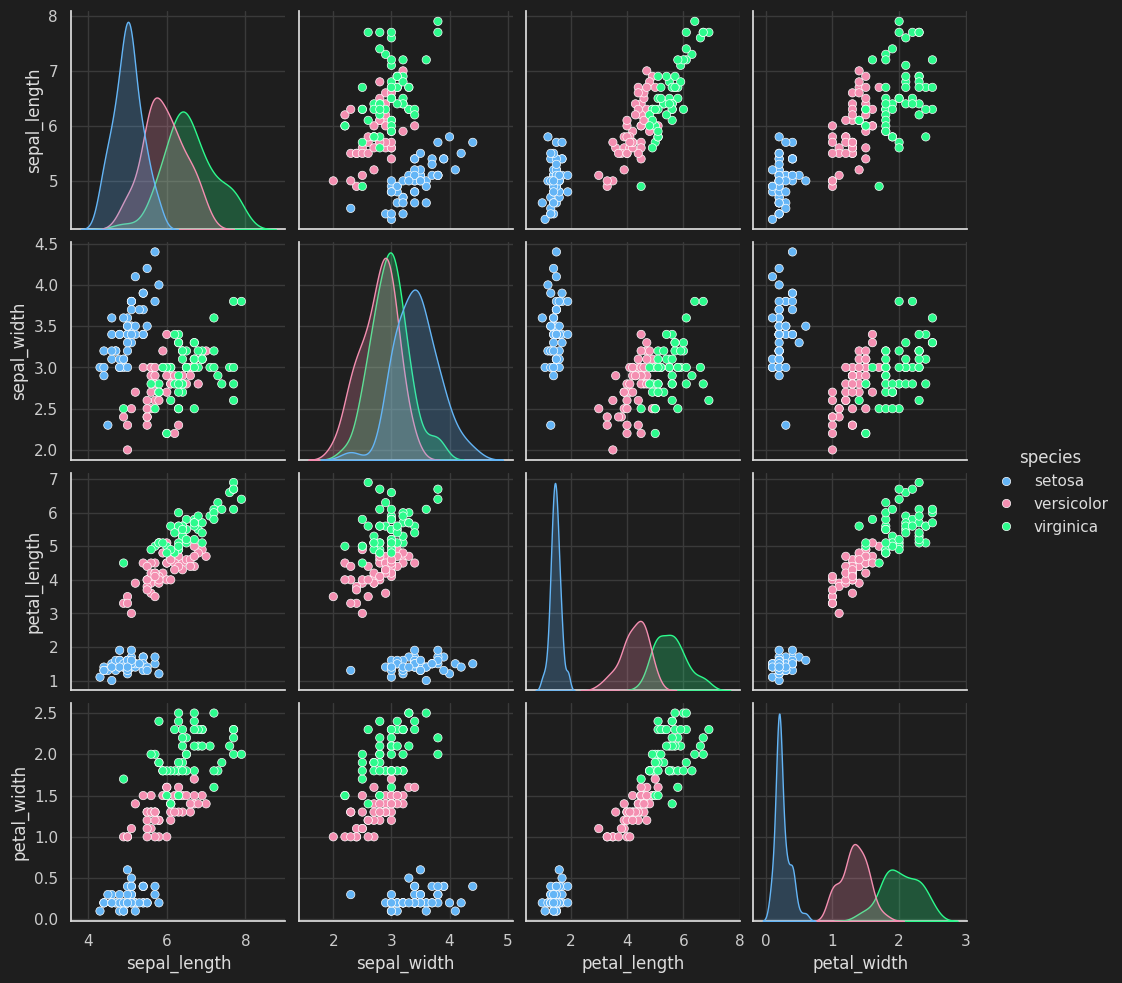

In [3]:
import seaborn as sns
palette = ["#64b5f6", "#f48fb1", "#2dfb8d"]  # blue, pink, amber

df_iris = sns.load_dataset("iris")
sns.pairplot(df_iris, hue="species", palette=palette)
plt.show()

## Exercise 3: Correlation heatmap for Penguins
Goal: Visualize correlations between penguin measurements.

- Load the "penguins" dataset.
- Compute correlation matrix: df.corr(numeric_only=True).
- Plot a heatmap with sns.heatmap() and annot=True.
- Bonus: use cmap="coolwarm".

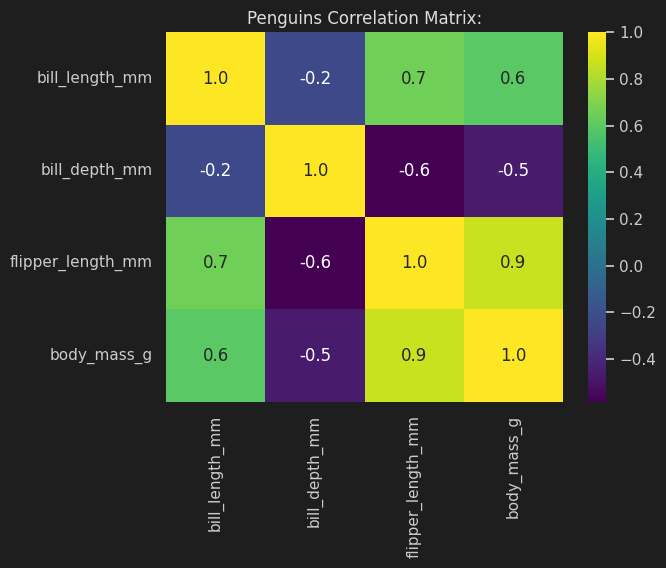

In [ ]:
import seaborn as sns
df_penguins = sns.load_dataset("penguins")
correlation_matrix = df_penguins.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.title("Penguins Correlation Matrix:")
plt.show()

## Generate synthetic employee dataset (needed for Exercises 4–6)

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
# Show all previews instead of only last
InteractiveShell.ast_node_interactivity = "all"

# Run this to generate synthetic employee data
np.random.seed(42)
df_employees = pd.DataFrame({
    "sex": np.random.choice(["Male", "Female"], size=100),
    "age": np.random.normal(35, 10, size=100),
    "salary": np.random.normal(5000, 1500, size=100),
    "department": np.random.choice(["IT", "HR", "Marketing", "Sales"], size=100),
    "experience": np.random.randint(1, 15, 100),
})

print("First 5 rows:")
df_employees.head()
print("Descriptive stats:")
df_employees.describe()

First 5 rows:


,sex,age,salary,department,experience
0,Male,42.384666,5341.189902,Sales,2
1,Female,36.713683,6960.714131,HR,3
2,Male,33.843517,2588.775148,Marketing,12
3,Male,31.988963,5276.950788,HR,1
4,Male,20.214780,5389.824191,IT,1


Descriptive stats:


,age,salary,experience
count,100.000000,100.000000,100.000000
mean,34.698147,5167.811493,7.350000
std,9.386715,1502.735701,4.353972
min,8.802549,1962.286120,1.000000
25%,29.139968,3928.115764,3.000000
50%,34.647311,5332.938893,8.000000
75%,40.316648,5993.471966,11.250000
max,59.632421,10779.097236,14.000000


## Exercise 4: Violinplot for salary vs. experience
Goal: Analyze salary distributions by experience and sex.

- Create experience categories (Junior: 1–5, Mid: 6–10, Senior: 11–15).
- Build a violinplot with sns.violinplot().
- X-axis: experience categories; Y-axis: salary.
- Use hue="sex" and split=True to compare genders.

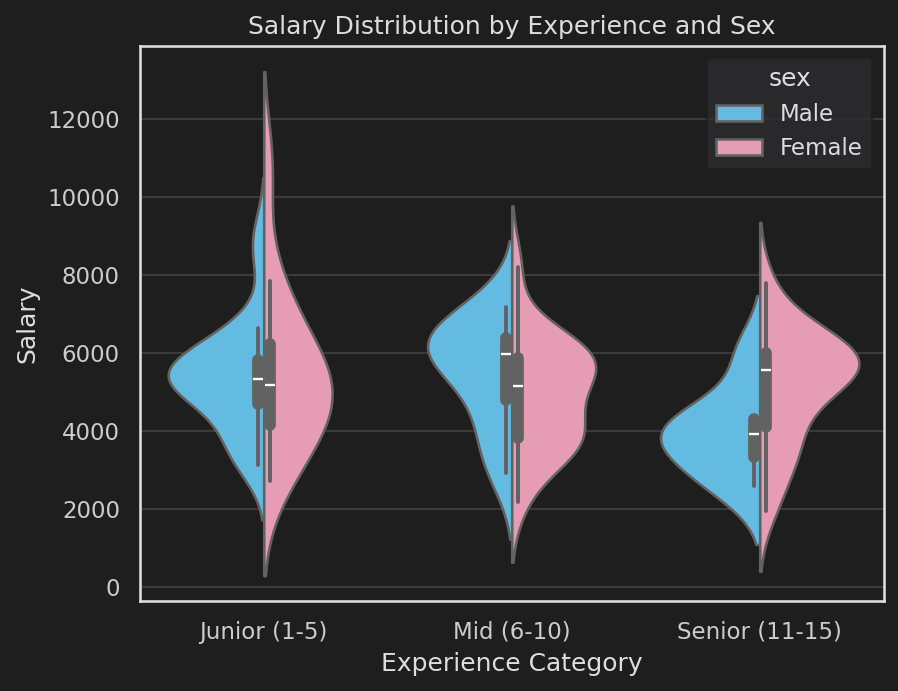

In [12]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

df_employees["exp_category"] = pd.cut(
    df_employees["experience"],
    bins=[0, 5, 10, 15],
    labels=["Junior (1-5)", "Mid (6-10)", "Senior (11-15)"]
)

plt.figure(dpi=150)

sns.violinplot(data=df_employees, x="exp_category", y="salary", hue="sex", split=True)
plt.title("Salary Distribution by Experience and Sex")
plt.xlabel("Experience Category")
plt.ylabel("Salary")
plt.show()

A **violin plot** shows the full **distribution** of data.

* The **width** at any height = how many values occur there (density).
* The **white line** = **median (50th percentile)**.
* The **thick bar** = **IQR (Q1–Q3)** → middle 50% of values.
* The **thin lines** = whiskers → lower/upper adjacent values.
* The **shape** mirrors both sides, like a smoothed histogram.

Wide = common values. Narrow = rare values.  

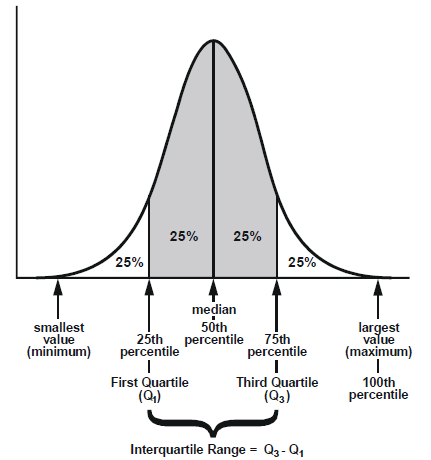  

## Exercise 5: FacetGrid by department and sex
Goal: Compare salary distributions across departments and genders.

- Create a FacetGrid with col="department", hue="sex".
- Map a histplot for salary.
- Add a legend with .add_legend().

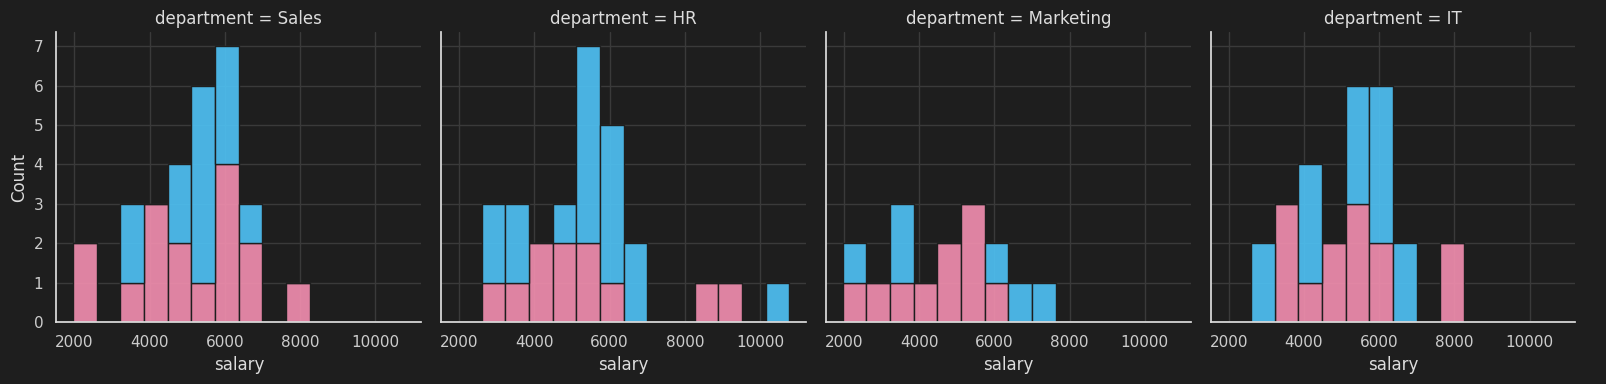

In [7]:
bins = np.linspace(df_employees["salary"].min(), df_employees["salary"].max(), 15)

g = sns.FacetGrid(df_employees, col="department", height=4)
g.map_dataframe(sns.histplot, x="salary", hue="sex", bins=bins, alpha=0.9, multiple="stack")
g.add_legend()
plt.show()

In [16]:
df_employees.query('department == "Sales" and 7000 <= salary < 10000 and sex == "Female"')

,sex,age,salary,department,experience,exp_category
94,Female,25.805758,8215.916134,Sales,7,Mid (6-10)


## Exercise 6: Barplot to compare salaries
Goal: Compare average salary between younger and older employees.

- Create an age_group column:
  - "Under 30" if age < 30
  - "30 and over" if age >= 30
- Build a barplot with sns.barplot() on salary by age_group.
- Bonus: add hue="sex".

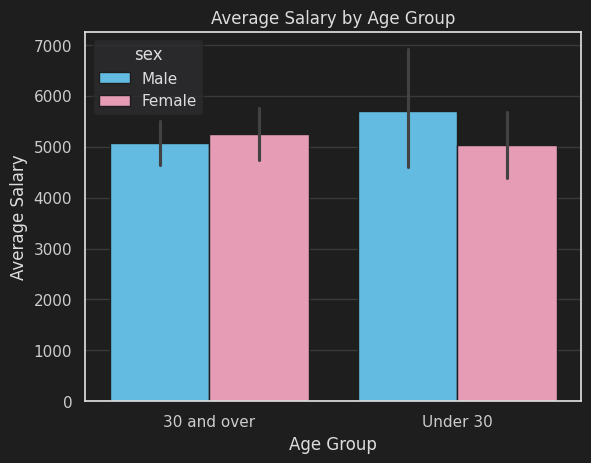

In [8]:
df_employees["age_group"] = df_employees["age"].apply(
    lambda x: "Under 30" if x < 30 else "30 and over"
)

sns.barplot(data=df_employees, x="age_group", y="salary", hue="sex")
plt.title("Average Salary by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Salary")
plt.show()

# Bonus: add hue="sex" to compare Male vs Female

# Reflection Questions

#### 1. What differences did you notice between histplot and violinplot?
- Basically the same except the violin plot is turned 90 Degrees and can contain 2 comparing datasets, as well as median and IQR
#### 2. What relationships are easier to see with a pairplot?  
- Distribution, isolated clusters and correlated data
### 3. Why use a FacetGrid instead of a single plot?
- To compare and isolate subgroups
#### 4. What did you learn from the synthetic employee dataset?
- Distribution follows non logical patterns due to the random generation